<a href="https://colab.research.google.com/github/xcellentbird/Study-Deep_Learning/blob/main/SGD_%EC%83%9D%EC%84%A0_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# 데이터를 불러온다.
fish = pd.read_csv('https://bit.ly/fish_csv')

# 특성 5개를 가진 입력 데이터를 만든다
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
# 타겟 데이터를 얻는다.
fish_target = fish['Species'].to_numpy()

print(fish_target.shape)

(159,)


In [ ]:
from sklearn.model_selection import train_test_split

# 학습, 데스트 데이터셋 나누기
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=45)

print(train_input.shape)
print(test_input.shape)

(119, 5)
(40, 5)


In [ ]:
from sklearn.preprocessing import StandardScaler

# 데이터 정규화
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
# 확률적 경사 하강 분류기
from sklearn.linear_model import SGDClassifier

train_score = []
test_score = []
iter_list = [10**x for x in range(10)]
for iter in iter_list:
  # 손실 함수를 'log'로 맞추고 최대 반복횟수를 iter만큼
  sc = SGDClassifier(loss='log', max_iter=iter, random_state=45)
  sc.fit(train_scaled, train_target)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


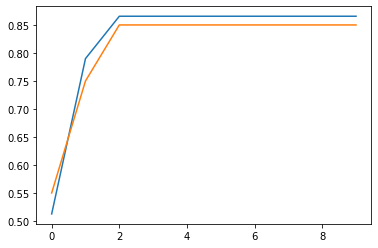

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.log10(iter_list), train_score)
plt.plot(np.log10(iter_list), test_score)
plt.show()

In [ ]:
train_score = []
test_score = []
label = np.unique(train_target)
sc = SGDClassifier(loss='log', max_iter=100, random_state=45)
sc.fit(train_scaled, train_target)
# 경사 하강 모델을 점진적(spartial_fit) 학습 시켰을 때, 즉 epoch를 점점 증가시켰을 때의 결과
for _ in range(300):
  sc.partial_fit(train_scaled, train_target, classes=label)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

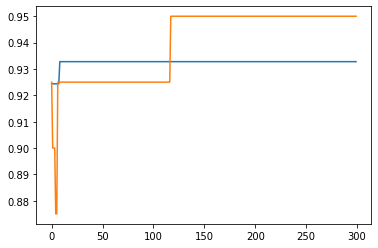

In [ ]:
plt.plot(train_score)
plt.plot(test_score)
plt.show()

In [ ]:
train_score = []
test_score = []
label = np.unique(train_target)

# 손실 함수를 hinge라는 SVM으로 잡았다.
sc = SGDClassifier(loss='hinge', max_iter=100, random_state=45)
sc.fit(train_scaled, train_target)
for _ in range(300):
  sc.partial_fit(train_scaled, train_target, classes=label)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

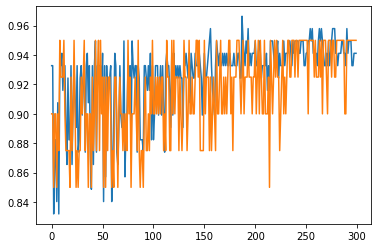

In [ ]:
plt.plot(train_score)
plt.plot(test_score)
plt.show()
# ... 이건 왜 이렇게 됐을까??
# hinge 손실 함수의 특성을 알아봐야겠따

In [ ]:
max(zip(train_score, test_score), key = lambda x: sum(x))

(0.957983193277311, 0.95)